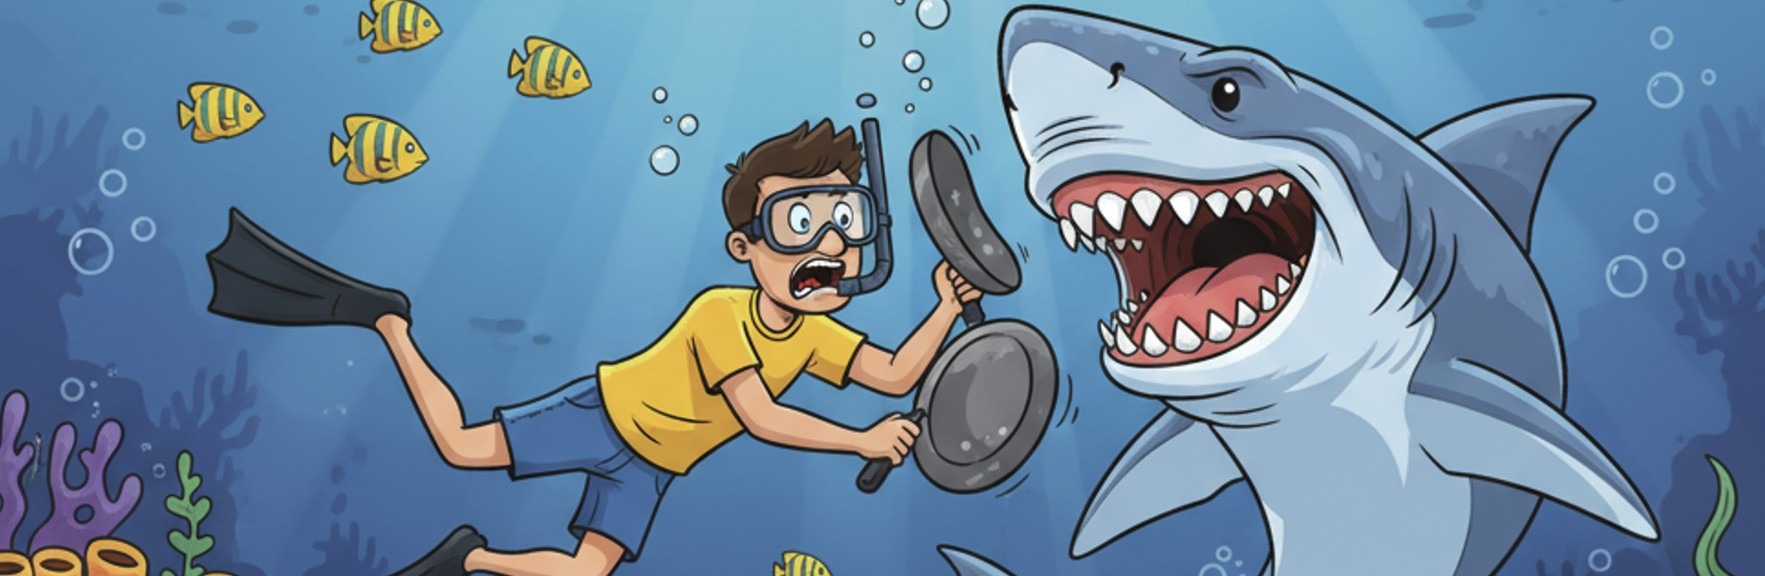

# **1. Preprocesamiento**
---

## **1.1. Importar Paquetes**

Realizamos la importación de las librerías que se utilizaran en el presente informe.

In [442]:
# ====================================
# Importación de librerías necesarias
# ====================================

# Librerías estándar de Python
import os
import sys
import re
from datetime import datetime

# Librerías de análisis numérico y manejo de datos
import numpy as np
import pandas as pd
import unicodedata

# Librerías de visualización 
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [443]:
# Mostrar gráficos dentro del notebook
%matplotlib inline

# Mejor calidad en pantallas
%config InlineBackend.figure_format = 'retina'

# Tema de Seaborn (fondos, rejilla, colores)
sns.set_theme(
    context="notebook",   # Tamaños adaptados a Jupyter ("paper", "talk", "poster")
    style="whitegrid",    # Fondo con rejilla clara
    palette="deep",       # Paleta de colores
    font_scale=1.1        # Escala de fuentes (ajustar si se ve muy grande o muy pequeño)
)

# Ajustes globales de Matplotlib
plt.rcParams["figure.figsize"] = (10, 6)   # Tamaño de las figuras
plt.rcParams["axes.titlesize"] = 14        # Tamaño de los títulos
plt.rcParams["axes.labelsize"] = 12        # Tamaño de las etiquetas
plt.rcParams["legend.fontsize"] = 11       # Tamaño de la leyenda
plt.rcParams["xtick.labelsize"] = 11       # Tamaño ticks eje X
plt.rcParams["ytick.labelsize"] = 11       # Tamaño ticks eje Y

In [444]:
# Versión de Python y las demás librerías.
print('\nEsta actividad se realizó con las siguientes versiones:\n')
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', plt.matplotlib.__version__)
print('Seaborn', sns.__version__)
#print('Scikit-learn', sklearn.__version__)


Esta actividad se realizó con las siguientes versiones:

Python 3.10.12
NumPy 2.2.6
Pandas 2.3.2
Matplotlib 3.10.6
Seaborn 0.13.2


In [445]:
# Directorio Actual
print("Directorio actual:", os.getcwd())

Directorio actual: /home/neo/PROJECTS/IronHack_Esp_Big_Data/15_dia/exercises/PROYECTO/proyecto_shark_attacks/models


## **1.2. Funciones Implementadas**

In [446]:
# Setup de utils
PROJECT_ROOT = os.path.abspath(os.path.join(".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
print("Python buscará paquetes en:", PROJECT_ROOT)

Python buscará paquetes en: /home/neo/PROJECTS/IronHack_Esp_Big_Data/15_dia/exercises/PROYECTO/proyecto_shark_attacks


In [447]:
# --------------------------------------------------
# Importación de UDF funciones definidas por usuario
# --------------------------------------------------

# Habilitar autoreload
%load_ext autoreload
%autoreload 2

# Importar funciones de utils
from utils.data_cleaning import (
    clean_country_column, 
    clean_text,
    normalize_date, 
    normalize_text, 
    normalize_target, 
    get_missing_values,   
    remove_duplicates, 
    drop_na_subset, 
    plot_missing_data, 
    map_activity_to_category, 
    map_injury_regex, 
    map_species_info
    )
from utils.data_utils import (
    load_data,
    get_column_types, 
    get_month_numeric, 
    get_season, 
    save_selected_columns_csv,
    predict_shark_attack,
    load_data_model
    )
from utils.data_viz import (
    plot_value_counts,
    plot_value_category, 
    plot_value_category_multi,
    plot_age_distribution
    )
from utils.constants import NORTH_COUNTRIES, MAPPING_COUNTRIES

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **1.3. Importación de datos**

In [448]:
# 1.1 Cargar el archivo
df_clean_model = load_data_model("../data/processed/df_clean_attacks.csv")
#df_age = load_data_model("../data/processed/df_clean_with_age_attacks.csv")

if df_clean_model is not None:
    print("DataFrame: {df_clean_model} OK...")

DataFrame: {df_clean_model} OK...


/home/neo/PROJECTS/IronHack_Esp_Big_Data/15_dia/exercises/PROYECTO/proyecto_shark_attacks/utils/data_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [449]:
# Consultar categoria de variables
num_cols, cat_cols = get_column_types(df_clean_model)

Numéricas: ['Fatal_filled', 'Month_final_filled', 'Month_sin', 'Month_cos', 'Season_filled', 'Sex_filled', 'Injury_filled']
Categóricas: ['Case_Number_check_filled', 'Type_filled', 'Country_filled', 'Activity_filled', 'Size_category', 'Risk_category', 'Species_final_filled']


In [450]:
# La eliminación de columnas irrelevantes
df_clean_model = df_clean_model.drop(['Month_final_filled', 
                                      'Injury_filled',
                                      'Case_Number_check_filled', 
                                      'Size_category', 
                                      'Risk_category' 
                                      ]
                                      , axis=1)

In [451]:
# Creamos un nuevo df sin la columna Age
num_cols, cat_cols = get_column_types(df_clean_model)
all_cols = num_cols + cat_cols

Numéricas: ['Fatal_filled', 'Month_sin', 'Month_cos', 'Season_filled', 'Sex_filled']
Categóricas: ['Type_filled', 'Country_filled', 'Activity_filled', 'Species_final_filled']


# **Preprocesamiento**
---

Alistamiento de los datos para el entrenamiento

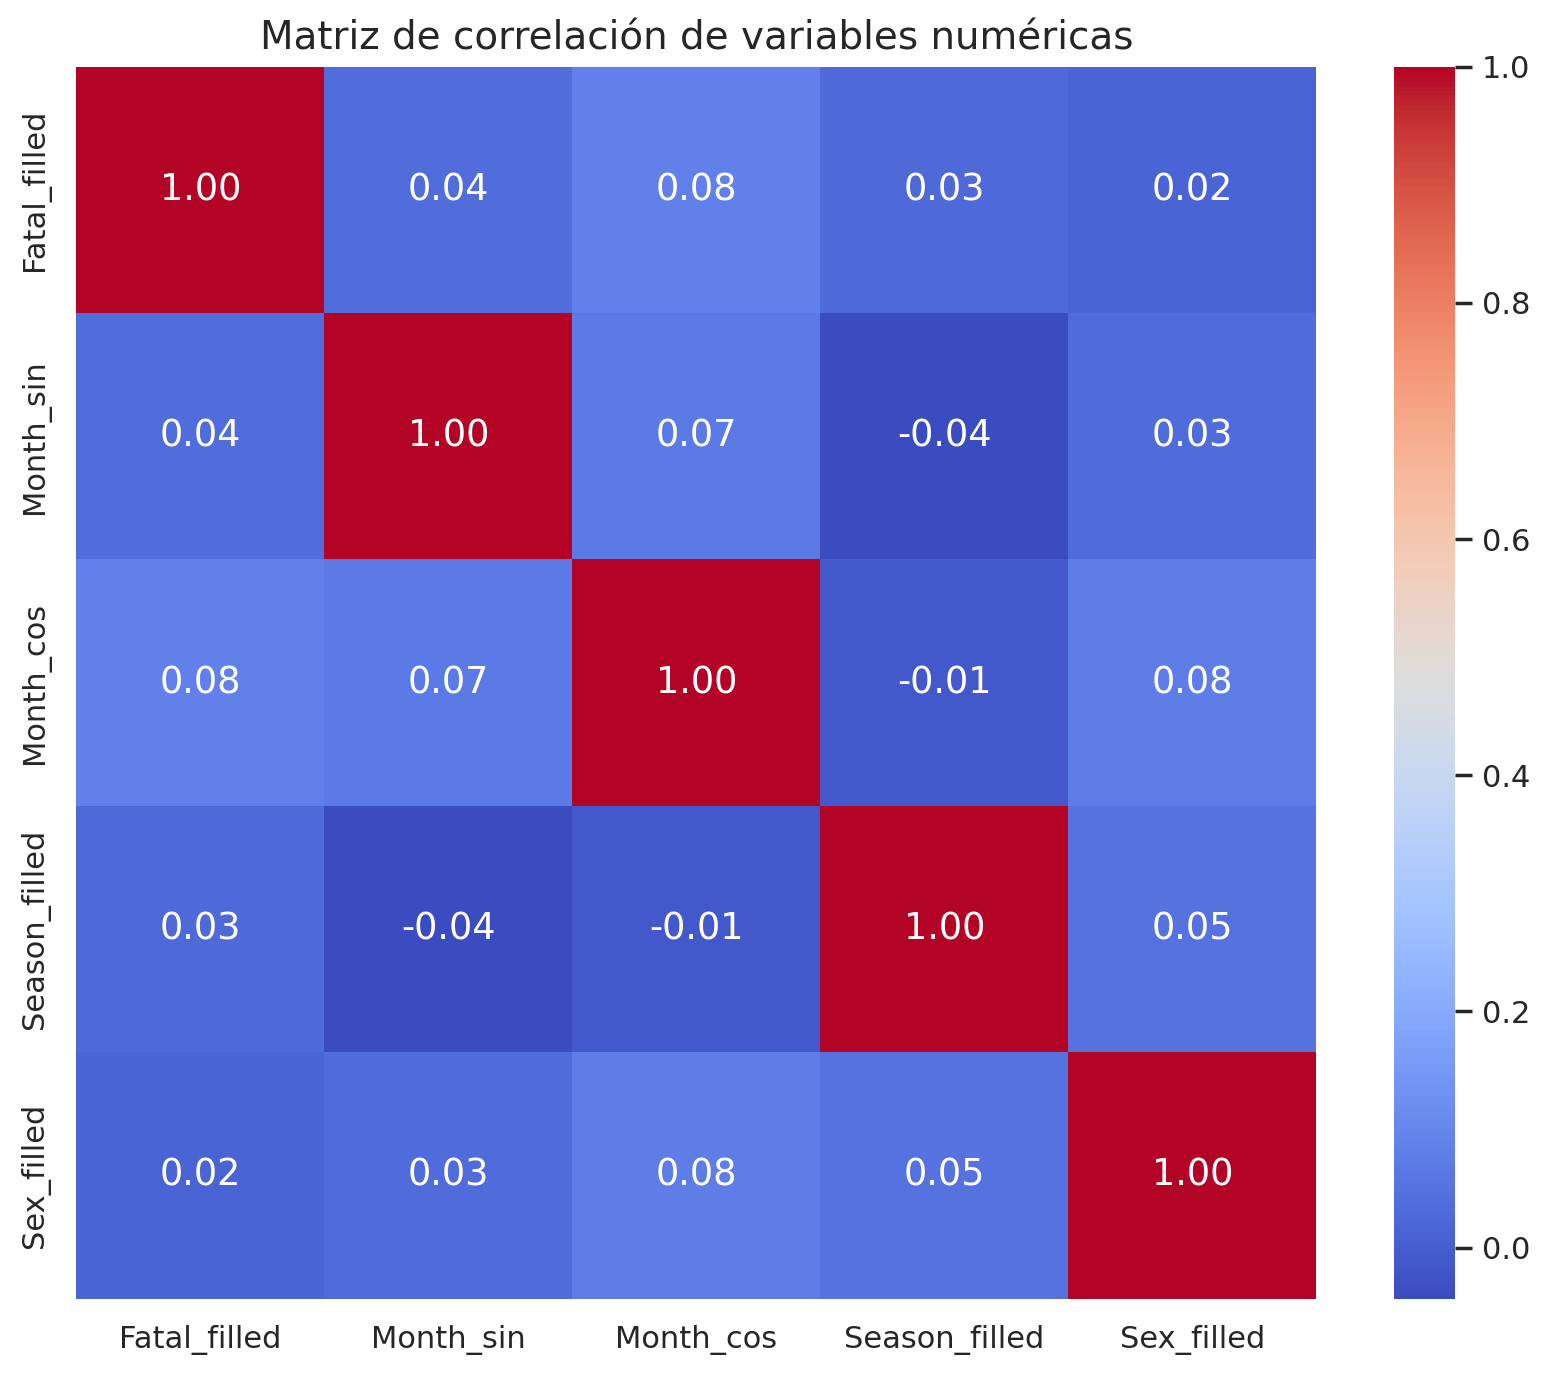

In [452]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo columnas numéricas
df_num = df_clean_model[num_cols]

# Matriz de correlación
corr_matrix = df_num.corr()

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

In [453]:
# Eliminacion de algun rastro de 
for col in num_cols:
    df_clean_model[col] = df_clean_model[col].fillna(df_clean_model[col].median())

for col in cat_cols:
    df_clean_model[col] = df_clean_model[col].fillna("Unknown")

In [454]:
df_clean_model.Species_final_filled.value_counts(dropna=False)

Species_final_filled
Unknown                1070
White Shark             472
Tiger Shark             217
Bull Shark              134
Blacktip Shark           84
Nurse Shark              83
Bronze Whaler Shark      57
Small Shark              46
Hammerhead Shark         40
Lemon Shark              27
Other Shark               8
Name: count, dtype: int64

In [455]:
# Consultar categoria de variables
num_cols, cat_cols = get_column_types(df_clean_model)

for col in cat_cols:
    print(df_clean_model[col].value_counts())
    print('-'*20)

Numéricas: ['Fatal_filled', 'Month_sin', 'Month_cos', 'Season_filled', 'Sex_filled']
Categóricas: ['Type_filled', 'Country_filled', 'Activity_filled', 'Species_final_filled']
Type_filled
unprovoked    1839
provoked       304
other           95
Name: count, dtype: int64
--------------------
Country_filled
UNITED STATES       1078
AUSTRALIA            597
SOUTH AFRICA         309
BAHAMAS               67
NEW ZEALAND           57
PAPUA NEW GUINEA      38
BRAZIL                29
REUNION               27
MEXICO                22
FIJI                  14
Name: count, dtype: int64
--------------------
Activity_filled
Surf & Board                     787
Diving                           485
Swimming & Wading                435
Fishing                          203
Unknown                          108
Playing & Leisure                100
Boating & Sailing                 65
Sharks & Dangerous Encounters     55
Name: count, dtype: int64
--------------------
Species_final_filled
Unknown          

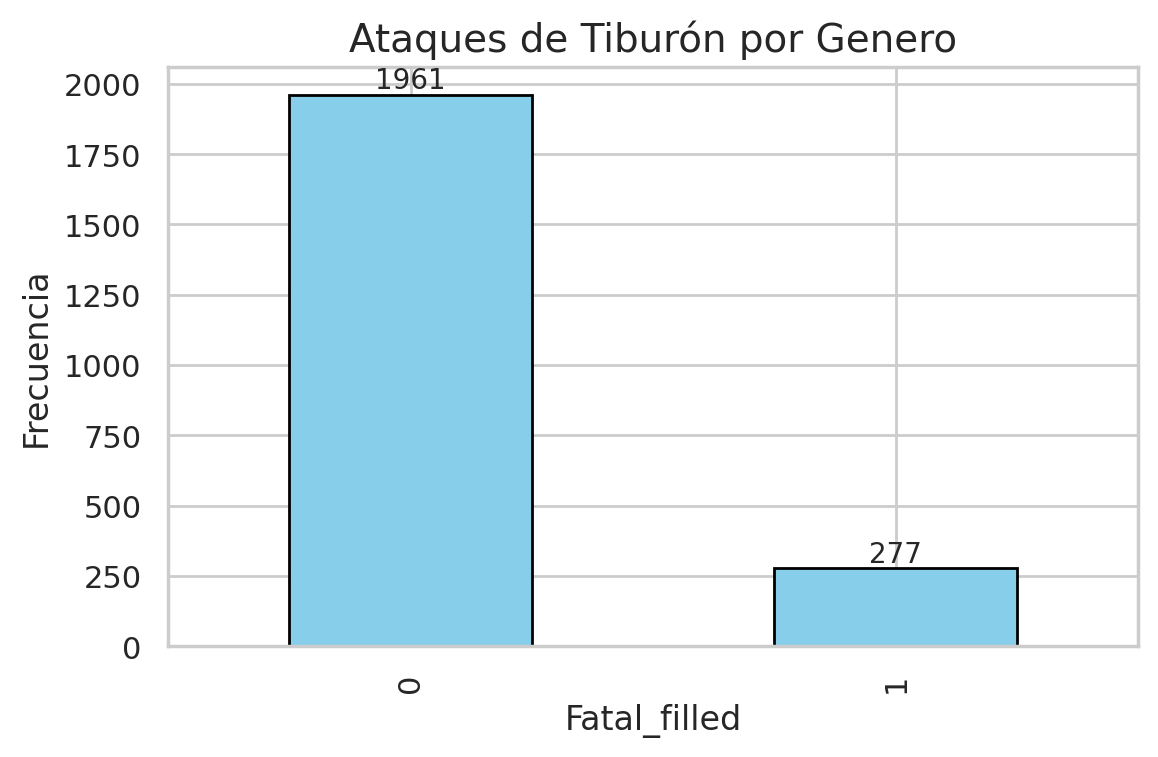

In [456]:
plot_value_counts(df_clean_model, 'Fatal_filled', 'Ataques de Tiburón por Genero')

# Caragando datos en X, y

Para convertir el *DataFrame* **`attack.csv`** en el formato **`X, y`** podemos hacer lo siguiente:

In [457]:
X = df_clean_model.drop(['Fatal_filled'], axis=1) # El conjunto de datos sin la variable objetivo 'Fatal_filled'.
y = df_clean_model['Fatal_filled']  # La columna de la variable objetivo 'Fatal_filled'.

print(X.shape)
print(y.shape)

(2238, 8)
(2238,)


Podemos ver que el conjunto de datos resultante tiene $712$ ejemplos con $9$ características.  

No incluimos **`Survived`** en **`X`** porque es la etiqueta que buscamos predecir. Incluirla sería un error conocido como **filtración de etiquetas**, que ocurre cuando se incluyen características durante el entrenamiento que proporcionan información de la etiqueta (o la misma etiqueta), que podría no estar disponible durante el tiempo de predicción. Imagínese entrenar un modelo para predecir la etiqueta, pero necesitarla como dato de entrada.

Aunque *Scikit-learn* acepta objetos convertibles a arreglos de *NumPy* como *DataFrames* y listas. Nos adelantaremos y convertiremos **`X`** y **`y`** en arreglos de NumPy.

In [458]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Primero veamos como convertir un objeto de *Pandas* a un arreglo de *NumPy*, esto se logra con el atributo **`values`** de un *DataFrame* o una *Serie*.

In [459]:
# .values retorna un arreglo de NumPy.
y = y.values

Separaremos **`X`** en dos arreglos de *NumPy*. Guardaremos las variables numéricas en **`X_numeric`** y las variables categóricas en **`X_categoric`**.

Las variables numéricas del conjunto de datos son: **`Age`**, **`SibSp`**, **`Parch`**, y **`Fare`**.

In [460]:
num_cols

['Fatal_filled', 'Month_sin', 'Month_cos', 'Season_filled', 'Sex_filled']

In [461]:
# Eliminamos la variable Target
numeric = ['Month_sin', 'Month_cos', 'Season_filled', 'Sex_filled']

# .values retorna un arreglo de NumPy.
X_numeric = X[numeric].values

print(X_numeric.shape)
print(type(X_numeric))

# .values retorna un arreglo de NumPy.
X_numeric = X[numeric].values

print(X_numeric.shape)
print(type(X_numeric))

(2238, 4)
<class 'numpy.ndarray'>
(2238, 4)
<class 'numpy.ndarray'>


Veamos algunos ejemplos:

In [462]:
for i in range(10):
  print(f'Ejemplo {i}:')
  print('Variables:', X_numeric[i])
  print('Etiqueta:', y[i])
  print()

Ejemplo 0:
Variables: [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00  0.0000000e+00]
Etiqueta: 0

Ejemplo 1:
Variables: [ 1.2246468e-16 -1.0000000e+00  4.0000000e+00  1.0000000e+00]
Etiqueta: 0

Ejemplo 2:
Variables: [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00  1.0000000e+00]
Etiqueta: 0

Ejemplo 3:
Variables: [ 1.2246468e-16 -1.0000000e+00  4.0000000e+00  1.0000000e+00]
Etiqueta: 1

Ejemplo 4:
Variables: [ 0.5       -0.8660254  1.         1.       ]
Etiqueta: 0

Ejemplo 5:
Variables: [ 0.5       -0.8660254  1.         1.       ]
Etiqueta: 0

Ejemplo 6:
Variables: [ 0.5       -0.8660254  3.         1.       ]
Etiqueta: 0

Ejemplo 7:
Variables: [ 0.5       -0.8660254  3.         0.       ]
Etiqueta: 0

Ejemplo 8:
Variables: [ 0.5       -0.8660254  3.         1.       ]
Etiqueta: 0

Ejemplo 9:
Variables: [ 0.8660254 -0.5        3.         1.       ]
Etiqueta: 0



Cómo podemos ver, son todas variables numéricas.


Las variables categóricas del conjunto de datos son: **`Pclass`**, **`Name`**, **`Sex`**, **`Ticket`** y **`Embarked`**.

> Si bien **`Pclass`** está almacenada como un tipo numérico, representa una variable categórica ordinal.

Primero veamos cuántos valores únicos tiene cada una:

In [463]:
cat_cols

['Type_filled', 'Country_filled', 'Activity_filled', 'Species_final_filled']

In [464]:
categoric = ['Type_filled', 'Country_filled', 'Activity_filled', 'Species_final_filled']

for var in categoric:
  print(f'Valores posibles de {var}: \t{X[var].nunique()}')

Valores posibles de Type_filled: 	3
Valores posibles de Country_filled: 	10
Valores posibles de Activity_filled: 	8
Valores posibles de Species_final_filled: 	11


No tendremos en cuenta **`Name`** y **`Ticket`** para el siguiente ejemplo por su gran cantidad de valores posibles. En este caso usaremos solamente las variables **`Pclass`**, **`Sex`** y **`Embarked`**.

In [465]:
# .values retorna un arreglo de numpy
X_categoric = X[categoric].values

print(X_categoric.shape)
print(type(X_categoric))

(2238, 4)
<class 'numpy.ndarray'>


Veamos algunos ejemplos:

In [466]:
ids = [0, 1, 15, 20]

for i in ids:
  print(f'Ejemplo {i}:')
  print('Variables:', X_categoric[i])
  print('Etiqueta:', y[i])
  print()

Ejemplo 0:
Variables: ['other' 'UNITED STATES' 'Unknown' 'White Shark']
Etiqueta: 0

Ejemplo 1:
Variables: ['unprovoked' 'AUSTRALIA' 'Surf & Board' 'Unknown']
Etiqueta: 0

Ejemplo 15:
Variables: ['other' 'BRAZIL' 'Fishing' 'Unknown']
Etiqueta: 0

Ejemplo 20:
Variables: ['unprovoked' 'AUSTRALIA' 'Swimming & Wading' 'Unknown']
Etiqueta: 0



* Los valores $1$, $2$ y $3$ corresponden a la clase de viaje del pasajero de la variable **`Pclass`**.
* Los valores **`male`** y **`female`** corresponden a la variable **`Sex`** (género de la persona).
* Los valores **`S`**, **`C`** y **`Q`** corresponden a la variable **`Embarked`**. Estos indican el puerto de embarque que utilizó la persona, donde **`C = Cherbourg`**, **`Q = Queenstown`** y **`S = Southampton`**.

## **2.7. Visualizaciones Generales**

# **3. Preprocesamiento**
---

*Scikit-learn* expone el paquete **`preprocessing`** el cual contiene una serie de transformaciones para variables numéricas tanto como categóricas.

La importancia del preprocesamiento radica en que puede potencialmente mejorar (o empeorar) el desempeño de los algoritmos de aprendizaje computacional. En el caso de variables categóricas para el caso de *Scikit-learn* no pueden ser usadas sin aplicar un preprocesamiento.

Las transformaciones de *Scikit-learn* son fáciles de usar. Estas implementan la interfaz **`Transformer`**, la cual expone los 3 siguientes métodos:

- **`fit(X)`**: *(del español ajustar)* permite aprender un conjunto de parámetros de **`X`** que son necesarios para aplicar la transformación (e.g la media, el mínimo o el máximo, el número de características, etc).

- **`transform(X)`**: *(del español transformar)* aplica el preprocesamiento a **`X`** y retorna **`X`** transformado.

- **`fit_transform(X)`**:*(del español ajustar y transformar)* aplica **`fit`** a **`X`** y retorna **`X`** transformado. Es utilizado como un atajo de una línea.

Algunas transformaciones no pueden usar **`transform`** sin haber usado **`fit`** previamente. De igual manera algunas transformaciones no necesitan parámetros y **`fit`** no tiene ningún efecto secundario.


En esta ocasión nosotros solo utilizaremos **`fit_transform`** para realizar el preprocesamiento.

## **3.1. Variables numéricas**
---

En esta ocasión introduciremos métodos de preprocesamiento numéricos bastante sencillos:

- **`StandardScaler`**
- **`MinMaxScaler`**

### **3.1.1. `StandardScaler`**
---

Veamos primero **`StandardScaler`**:

Este permite aplicar la transformación:

$$X^{\prime} = \frac{X - \mu}{\sigma}$$

Donde:
- $\mu\,$: Media aritmética de los datos.
- $\sigma\,$: Desviación estándar de los datos.

La transformación produce un nuevo conjunto de datos centrado en $0$ y con una desviación estándar de $1$.

In [467]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Declaramos el Transformer "StandardScaler"
X_numeric_standarized = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"

Aunque **`X_numeric`** tiene varias características numéricas, la transformación se aplica a cada una de las columnas de manera independiente.

Veamos algunos ejemplos:

In [468]:
for i in range(3):
  print('Ejemplo:', i)
  print('Original: ', X_numeric[i])
  print('Estandarizado: ', X_numeric_standarized[i])
  print()

Ejemplo: 0
Original:  [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00  0.0000000e+00]
Estandarizado:  [ 0.05392917 -1.38713778 -0.33555014 -2.78247866]

Ejemplo: 1
Original:  [ 1.2246468e-16 -1.0000000e+00  4.0000000e+00  1.0000000e+00]
Estandarizado:  [ 0.05392917 -1.38713778  1.81928835  0.35939179]

Ejemplo: 2
Original:  [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00  1.0000000e+00]
Estandarizado:  [ 0.05392917 -1.38713778 -0.33555014  0.35939179]



### **3.1.2. `MinMaxScaler`**
---

**`MinMaxScaler`** permite escalar los datos a un rango específico, es decir, si una característica se encuentra en el rango **`[min(X), max(X)]`** y el argumento **`feature_range = (0, 1)`**, entonces cada valor será escalado de tal manera que esté en el rango **`[0, 1]`**.

In [469]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # Declaramos el Transformer "MinMaxScaler"
X_numeric_minmax = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"

Al igual que **`StandardScaler`**, **`MinMaxScaler`** aplica su transformación a cada columna de manera independiente.

Veamos algunos ejemplos:

In [470]:
for i in range(3):
  print('Ejemplo:', i)
  print('Original: ', X_numeric[i])
  print('MinMax: ', X_numeric_minmax[i])
  print()

Ejemplo: 0
Original:  [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00  0.0000000e+00]
MinMax:  [0.5        0.         0.33333333 0.        ]

Ejemplo: 1
Original:  [ 1.2246468e-16 -1.0000000e+00  4.0000000e+00  1.0000000e+00]
MinMax:  [0.5 0.  1.  1. ]

Ejemplo: 2
Original:  [ 1.2246468e-16 -1.0000000e+00  2.0000000e+00  1.0000000e+00]
MinMax:  [0.5        0.         0.33333333 1.        ]



In [471]:
# Valores mínimo y máximo de todo el dataset.
X_numeric_minmax.min(), X_numeric_minmax.max()

(np.float64(0.0), np.float64(1.0))

Como vemos, todos los valores están entre $0$ y $1$.

**`StandardScaler`** y **`MinMaxScaler`** realizan transformaciones similares y el desempeño de cada una es dependediente del conjunto de datos.

En nuestro ejemplo usaremos **`X_numeric_minmax`** para entrenar nuestros modelos.

## **3.2. Variables categóricas**
---

Típicamente, los modelos de aprendizaje computacional no aceptan como entrada variables categóricas las cuales pueden estar representadas con cadenas de texto. Antes de ser empleadas necesitan ser preprocesadas en valores numéricos.

En esta ocasión veremos un método muy popular conocido como *One Hot Encoding*.

Emplearemos *One Hot Encoding* sobre la variable **`Embarked`**.

*One Hot Encoding* codifica una variable con $n$ valores posibles enumerados como $1, 2, ..., n$ en un vector de tamaño $n$; donde la $i$-ésima posición del vector está asociada con el $i$-ésimo valor posible.

Asumiendo que un ejemplo tiene el $j$-ésimo valor posible de la variable original, se procesa de la siguiente manera:

- Se asigna 1 en la posición $j$.
- Se asigna 0 al resto.

La variable **`Embarked`** tiene los siguientes valores únicos: **`S, C, Q`**.

Lo verificamos con el método **`unique`** de *NumPy*.

In [472]:
# Obtenemos los valores únicos de un arreglo de NumPy con el método "unique".
print(np.unique(X_categoric[:,2]))

['Boating & Sailing' 'Diving' 'Fishing' 'Playing & Leisure'
 'Sharks & Dangerous Encounters' 'Surf & Board' 'Swimming & Wading'
 'Unknown']


Por lo tanto, al aplicar *One Hot Encoding* a los siguientes datos:

|Embarked|
|:--:|
|C|
|Q|
|S|

Se transformarían de la siguiente manera:

|C|Q|S|
|--|--|--|
|**1**|0|0|
|0|**1**|0|
|0|0|**1**|

In [473]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = enc.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot.shape)
print(type(X_categoric_onehot))
print(X_categoric_onehot)

(2238, 32)
<class 'numpy.ndarray'>
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


Cómo podemos ver, la variable **`Sex`** con $2$ valores únicos, la variable **`Pclass`** con $3$ valores únicos y la variable **`Embarked`** con $3$ valores únicos fueron transformadas en $8$ variables distintas en total.

Veamos algunos ejemplos:

In [474]:
ids = [0, 1, 15, 20]
for i in ids:
  print('Ejemplo:', i)
  print('Original: ', X_categoric[i])
  print('One Hot: ', X_categoric_onehot[i])
  print()

Ejemplo: 0
Original:  ['other' 'UNITED STATES' 'Unknown' 'White Shark']
One Hot:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]

Ejemplo: 1
Original:  ['unprovoked' 'AUSTRALIA' 'Surf & Board' 'Unknown']
One Hot:  [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0.]

Ejemplo: 15
Original:  ['other' 'BRAZIL' 'Fishing' 'Unknown']
One Hot:  [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0.]

Ejemplo: 20
Original:  ['unprovoked' 'AUSTRALIA' 'Swimming & Wading' 'Unknown']
One Hot:  [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0.]



Antes de continuar al entrenamiento de modelos de aprendizaje computacional, usando *NumPy* juntaremos las variables numéricas preprocesadas y las variables categóricas preprocesadas en el arreglo **`X_full`**. Para esto usaremos la función **`np.concatenate`** para concatenar **`X_numeric_minmax`** y **`X_categoric_onehot`** a través del axis $1$ (columnas).

In [475]:
X_full = np.concatenate((X_numeric_minmax, X_categoric_onehot),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full.shape)

(2238, 36)


# **4. Entrenamiento de modelos**
---

En esta sección entrenaremos dos modelos de regresión logística.
- Uno utilizando solo las variables numéricas preprocesadas.
- Otro usando las variables numéricas y categóricas, ambas preprocesadas.

Generalmente los algoritmos de aprendizaje computacional son entrenados en una partición de **entrenamiento** (***train***) y probados en una partición de datos de **prueba** (***test***).

- Los datos de **entrenamiento** son aquellos datos de los cuales el algoritmo aprende.
- Los datos de **prueba** son aquellos que se usan para estimar el desempeño del algoritmo en datos desconocidos por el modelo.

Las particiones **NO** deben compartir datos. Con ayuda de *scikit-learn* podemos crear particiones de entrenamiento y prueba para hacer esto fácilmente.

## **4.1. Partición de entrenamiento y prueba**
---

*Scikit-learn* permite realizar una partición de entrenamiento y prueba fácilmente con la función **`train_test_split`** del paquete **`model_selection`**.

**`train_test_split(X, y)`** retorna una tupla **`X_train, X_test, y_train, y_test`** donde **`X_train, X_test`** son la partición entrenamiento - prueba de **`X`** y **`y_train, y_test`** son la partición de entrenamiento y prueba de **`y`**.

Tenga en cuenta que usted le puede poner cualquier nombre a las variables que retorna train_test_split, lo anterior es solo una convención.

Usando el parámetro **`test_size`** podemos indicar, con un número entre 0 y 1, el porcentaje de datos que deseamos usar para la partición de prueba.

Un ejemplo básico de uso, con $30\%$ de los datos para pruebas y $70\%$ para entrenamiento sería el siguiente:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
```

En nuestro caso le indicamos a **`train_test_split`** que utilice el $30\%$ de los datos como datos de prueba y la utilizamos con **`X_numeric_minmax`** y **`X_full`**.

A continuación importamos **`train_test_split`** del submódulo **`sklearn.model_selection`**.

In [476]:
# Submódulo de selección de modelos y partición de datos.
from sklearn.model_selection import train_test_split

# Lo usamos sobre **`X_numeric_minmax`**:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeric_minmax,
                                                                    y,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [477]:
# Y lo usamos sobre **`X_full`**:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=42)

**`train_test_split`** realiza la partición de manera aleatoria. Para especificar la semilla aleatoria se puede utilizar el parámetro **`random_state`**.

En este caso como tenemos dos versiones de **`X`** (**`X_numeric_minmax`** y **`X_full`**) y hemos utilizado la misma semilla aleatoria en ambos llamados de la función para asegurarnos que los ejemplos, aún con diferentes características, sean consistentes sobre cada partición.

Podemos verificar que efectivamente se respetó el ordenamiento:

In [478]:
print(all(y_train_num == y_train_full))
print(all(y_test_num == y_test_full))

True
True


Para simplificar las cosas asignamos las variables **`y_train`** y **`y_test`**:

In [479]:
y_train = y_train_num
y_test = y_test_num

## **4.2. Entrenamiento**
---

Debido a que el conjunto de datos *Titanic* plantea un problema de clasificación (supervivencia), usaremos un modelo de clasificación lineal llamado regresión logística.

Los modelos de clasificación buscan discernir el grupo al que pertenece un ejemplo (i.e., predecir su etiqueta).

Un modelo de clasificación recibe un conjunto de variables **`x`** (características) y produce una salida **`y`** (etiqueta) la cual es la predicción del modelo.

La salida de un modelo de clasificación suele estar codificada como un número. El numero está asociado a la clase (que el modelo predice) que pertenece el ejemplo.

Utilizaremos el modelo generado por la función **`LogisticRegression`** del paquete **`linear_model`** de *Scikit-learn*.

En *scikit-learn* los modelos suelen implementar la interfaz **`Estimator`** y **`Predictor`**.

Por ahora nos interesa saber que:

- Los **`Estimator`** implementan **`fit(X, y)`**.
- Los **`Predictor`** implementan **`predict(X)`**.

Los modelos deben ser *ajustados* antes de ser utilizados para realizar cualquier predicción.

En *scikit-learn* entrenar un modelo de aprendizaje computacional es tan sencillo como importarlo, crear una instancia y utilizar **`fit`**.

> **Nota:** Para nuestro ejemplo, en el entrenamiento utilizaremos cada versión de **`X_train`** (**`X_train_num`** y **`X_train_full`**) con el objetivo de entrenar dos modelos distintos.

## **4.3. Clasificador de variables numéricas**
---

Primero entrenaremos una regresión logística utilizando únicamente las variables numéricas.

Importamos el paquete **`linear_model`** que incluye la clase **`LogisticRegression`**.

In [480]:
# Submódulo de modelos lineales.
from sklearn import linear_model

Creamos una instancia de **`LogisticRegression`** y la guardamos en la variable **`clf_numeric`**.

In [481]:
clf_numeric = linear_model.LogisticRegression()

**`clf_numeric`** no ha sido entrenado, para esto usamos el método **`fit`** con:
 - **`X_train_num`**: matriz con las características numéricas de la partición de entrenamiento.
 - **`y_train`**: vector con las etiquetas de la partición de entrenamiento.

In [482]:
clf_numeric.fit(X_train_num, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## **4.4. Clasificador de variables numéricas y categóricas**
---

Para entrenar un segundo modelo con todas las variables numéricas y categóricas (preprocesadas) realizamos los siguientes pasos:

Creamos una instancia y la guardamos en **`clf_full`**:

In [483]:
# Variables numéricas y categóricas.
clf_full = linear_model.LogisticRegression()

Utilizamos **`fit`** pero esta vez con **`X_train_full`**, la matriz con las características tanto numéricas como categóricas de la partición de entrenamiento.

In [484]:
clf_full.fit(X_train_full, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# **5. Evaluación**
---

- Calcularemos la exactitud y el error de cada clasificador entrenado en la partición de entrenamiento y prueba.
  - La exactitud se define como:
  $$\text{exactitud} = \frac{\text{Número de ejemplos correctamente clasificados}}{\text{Número total de ejemplos}}$$
  - y el error se define como:
  $$\text{error} = 1.0\, - \text{exactitud}$$
En *scikit-learn* la **exactitud** se puede calcular mediante la función **`accuracy_score`** del paquete **`metrics`**.

> **Nota**: Se profundizará en distintas métricas de rendimiento en las unidades siguientes.

A continuación, importamos **`accuracy_score`**.

In [485]:
from sklearn.metrics import accuracy_score

## **5.1. Clasificador variables numéricas**
---

Primero veamos algunas predicciones del modelo sobre la partición de prueba, para esto debemos usar el método **`predict`**:

In [486]:
# El método predict se debería utilizar sobre un clasificador entrenado previamente.

y_pred = clf_numeric.predict(X_test_num) # Retorna un arreglo con la predicción de la variable objetivo por cada ejemplo.

for i in range(10):
  print(f'Predicho: {y_pred[i]}, Etiqueta: {y_test[i]}\n')

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0

Predicho: 0, Etiqueta: 0



Como podemos ver, el modelo solo se equivoca en $2$ de los primeros $5$ ejemplos. Note que **`predict`** acepta una matriz, un error común es tratar de usar **`predict`** con vectores.

Para calcular la exactitud sobre toda la partición de prueba utilizamos **`accuracy_score`**:

> **`accuracy_score`** recibe como primer parámetro las etiquetas reales y como segundo parámetro las etiquetas predichas.

In [487]:
# Obtenemos la predicción del clasificador usando variables numéricas.
y_pred = clf_numeric.predict(X_test_num)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.8883928571428571
Error en prueba: 0.1116071428571429


Veamos las métricas sobre la partición de entrenamiento:

In [488]:
# Obtenemos la predicción del clasificador usando tanto variables numéricas como categóricas.
y_pred = clf_numeric.predict(X_train_num)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.8731843575418995
Error en entrenamiento: 0.1268156424581005


Como podemos ver, el error de entrenamiento es menor que el error de prueba.

## **5.2. Clasificador variables numéricas y categóricas**
---

Veamos las métricas sobre la partición de entrenamiento:

In [489]:
y_pred = clf_full.predict(X_train_full)
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.88268156424581
Error en entrenamiento: 0.11731843575418999


Veamos las métricas sobre la partición de prueba:

In [490]:
y_pred = clf_full.predict(X_test_full)
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.8861607142857143
Error en prueba: 0.1138392857142857


Exactitud: 0.8862
Precision: 0.8476
Recall: 0.8862
F1-score: 0.8524


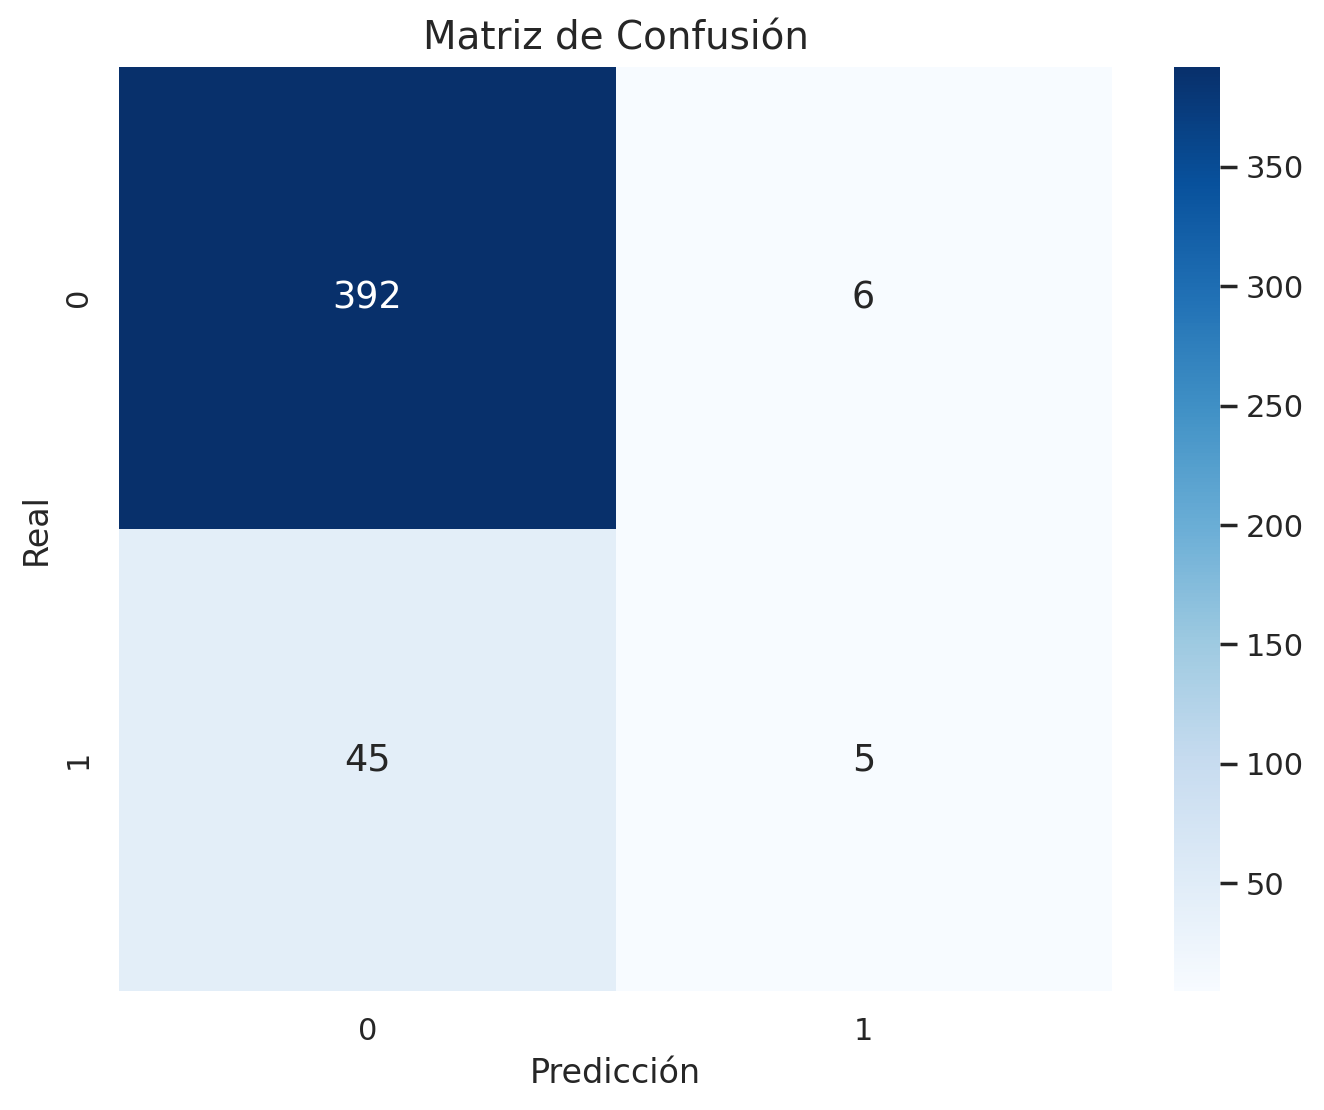

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       398
           1       0.45      0.10      0.16        50

    accuracy                           0.89       448
   macro avg       0.68      0.54      0.55       448
weighted avg       0.85      0.89      0.85       448



In [491]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes X_test e y_test
y_pred = clf_full.predict(X_test_full)

# 1️⃣ Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.4f}")

# 2️⃣ Precision, Recall, F1-score (por clase y promedio)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 3️⃣ Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 4️⃣ Reporte completo por clase
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


## **Probar el modelo**

In [492]:
mis_datos = pd.DataFrame({
    "Fatal_filled": [0],
    "Month_final_filled": [7],
    "Month_sin": [0.96],
    "Month_cos": [0.28],
    "Season_filled": [3],
    "Sex_filled": [1],
    "Injury_filled": [0],
    "Country_filled": ["UNITED STATES"],
    "Activity_filled": ["SWIMMING"],
    "Size_category": ["MEDIUM"],
    "Risk_category": ["LOW"],
    "Species_final_filled": ["UNKNOWN"]  # solo si necesitas target
})

In [493]:
# Supongamos que tienes LabelEncoders guardados en `encoders`
# y un modelo `clf_full` entrenado
resultado, prob = predict_shark_attack(clf_full, mis_datos, encoders=mis_datos, scaler=scaler)

print(f"Predicción: {resultado}")
print(f"Probabilidades: {prob}")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Predecir si sobreviven o no
predicciones = clf_full.predict(mis_datos)  # o mis_datos_scaled si aplicaste escalado

# Mostrar resultados
for i, pred in enumerate(predicciones):
    print(f"Pasajero {i+1}: {'Sobrevivirá' if pred == 1 else 'No sobrevivirá'}")

Cómo podemos ver incluir las variables categóricas mejora el desempeño del mismo algoritmo substancialmente.

En *Titanic* un indicador de supervivencia muy importante es el género, una proporción mucho más grande de mujeres que de hombres sobrevivieron a la tragedia. Esto puede ser utilizado para interpretar la mejora de desempeño del modelo.

## **Recursos adicionales**
---

Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Scikit-learn*:

- [*Scikit-learn - Datasets*](https://scikit-learn.org/stable/datasets.html)
- [*Scikit-learn - Preprocessing*](https://scikit-learn.org/stable/modules/preprocessing.html)
- [*Scikit-learn - Linear models*](https://scikit-learn.org/stable/modules/linear_model.html)

# **Créditos**
---

* **Docente:** Xisca
* **Equipo:**
  - [Alejandro Gerena](https://github.com/hagr27)
  - [Margaret Pino](https://github.com/test)

**IronHack. Madrid-España** - *Especialista Big Data*